In [1]:
# Ignore the warnings
import warnings
warnings.filterwarnings('ignore')

# To handle and maniplate data
import numpy as np
import pandas as pd

# For Data Visualization
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import seaborn as sns

# Configure Visualizations
%matplotlib inline
sns.set_style('white')

In [2]:
pokemon = pd.read_csv('Pokemon.csv')
pokemon.head()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


In [3]:
# Name : Name of the Pokemon
# Type 1 : First ability
# Type 2 : Second ability
# Total : Sum of all power points
# HP : Health Points
# Attack : Attack points
# Defense : Defense points
# Sp. Atk : Speed points on attack
# Sp. Def : Speed points on defense
# Speed : Speed points
# Generation : Number of generation
# Legendary : True whether it is a legendary character or not

In [4]:
# No of rows and columns
pokemon.shape

(800, 13)

In [5]:
# Data is already Indexed , so let's drop '#' column
pokemon.drop('#',inplace=True,axis=1)
pokemon.shape

(800, 12)

In [6]:
pokemon.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 12 columns):
Name          800 non-null object
Type 1        800 non-null object
Type 2        414 non-null object
Total         800 non-null int64
HP            800 non-null int64
Attack        800 non-null int64
Defense       800 non-null int64
Sp. Atk       800 non-null int64
Sp. Def       800 non-null int64
Speed         800 non-null int64
Generation    800 non-null int64
Legendary     800 non-null bool
dtypes: bool(1), int64(8), object(3)
memory usage: 69.6+ KB


In [7]:
# We see that Type 2 has null values, lets fill it with same values as in the 'Type 1'
pokemon['Type 2'].fillna( pokemon['Type 1'] , inplace = True)

# let's take a look again
pokemon.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 12 columns):
Name          800 non-null object
Type 1        800 non-null object
Type 2        800 non-null object
Total         800 non-null int64
HP            800 non-null int64
Attack        800 non-null int64
Defense       800 non-null int64
Sp. Atk       800 non-null int64
Sp. Def       800 non-null int64
Speed         800 non-null int64
Generation    800 non-null int64
Legendary     800 non-null bool
dtypes: bool(1), int64(8), object(3)
memory usage: 69.6+ KB


In [8]:
# Let's look at different categories of Type 1 Pokemon
pokemon['Type 1'].value_counts()

Water       112
Normal       98
Grass        70
Bug          69
Psychic      57
Fire         52
Rock         44
Electric     44
Dragon       32
Ground       32
Ghost        32
Dark         31
Poison       28
Fighting     27
Steel        27
Ice          24
Fairy        17
Flying        4
Name: Type 1, dtype: int64

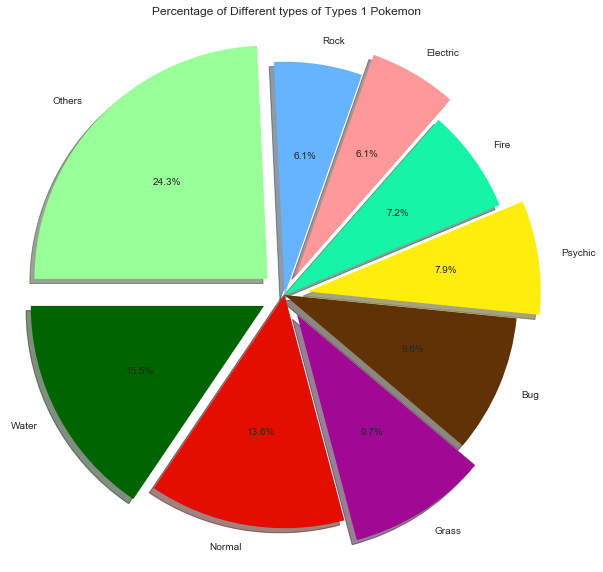

In [9]:
# Visualize all categories of Type 1 Pokemon via Pie Chart

labels = 'Water', 'Normal', 'Grass', 'Bug', 'Psychic', 'Fire', 'Electric', 'Rock', 'Others'
sizes = [112, 98, 70, 69, 57, 52, 44, 44, 175]
colors = ['#006400', '#E40E00', '#A00994', '#613205', '#FFED0D', '#16F5A7','#ff9999','#66b3ff','#99ff99']
explode = (0.1, 0.0, 0.1, 0, 0.1, 0.0, 0.1, 0, 0.1) 
plt.pie(sizes, explode=explode, labels=labels, colors=colors,autopct='%1.1f%%', shadow=True, startangle=180)
plt.axis('equal')
plt.title("Percentage of Different types of Types 1 Pokemon")
plt.plot()
fig=plt.gcf()
fig.set_size_inches(10,10)
plt.show()

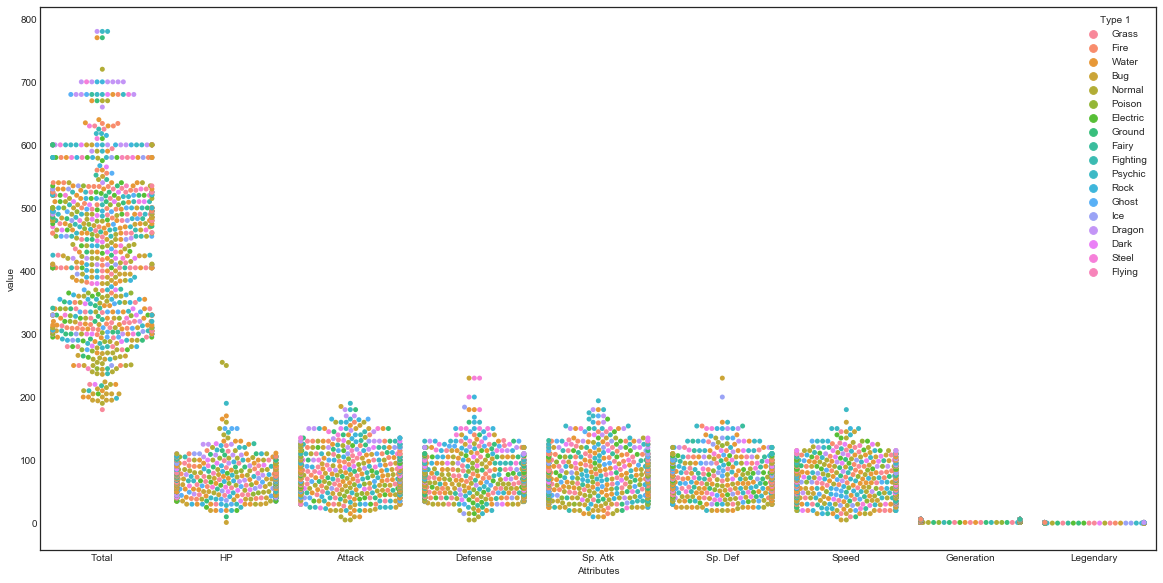

In [10]:
pkmn = pd.melt(pokemon, id_vars=["Name", "Type 1", "Type 2"], var_name="Attributes")
figure = plt.figure(figsize=(20,10))
g=sns.swarmplot(x='Attributes',y='value',data=pkmn,hue='Type 1')

In [11]:
# Let's look at different categories of Type 2 Pokemon
pokemon['Type 2'].value_counts()

Flying      99
Water       73
Psychic     71
Normal      65
Grass       58
Poison      49
Ground      48
Fighting    46
Fire        40
Fairy       38
Electric    33
Dark        30
Dragon      29
Ice         27
Steel       27
Ghost       24
Rock        23
Bug         20
Name: Type 2, dtype: int64

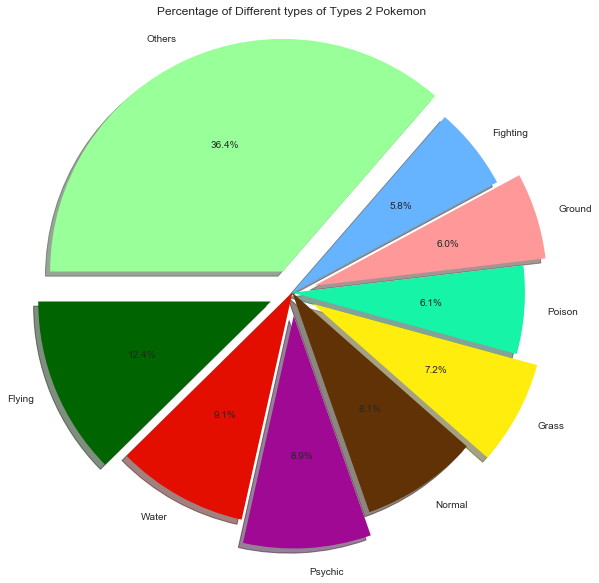

In [12]:
# Similarly Pie-Chart to Visualize Type 2 Pokemon

labels = 'Flying', 'Water', 'Psychic', 'Normal', 'Grass', 'Poison', 'Ground', 'Fighting', 'Others'
sizes = [99, 73, 71, 65, 58, 49, 48, 46, 291]
colors = ['#006400', '#E40E00', '#A00994', '#613205', '#FFED0D', '#16F5A7','#ff9999','#66b3ff','#99ff99']
explode = (0.1, 0.0, 0.1, 0, 0.1, 0.0, 0.1, 0, 0.1) 
plt.pie(sizes, explode=explode, labels=labels, colors=colors,autopct='%1.1f%%', shadow=True, startangle=180)
plt.axis('equal')
plt.title("Percentage of Different types of Types 2 Pokemon")
plt.plot()
fig=plt.gcf()
fig.set_size_inches(10,10)
plt.show()

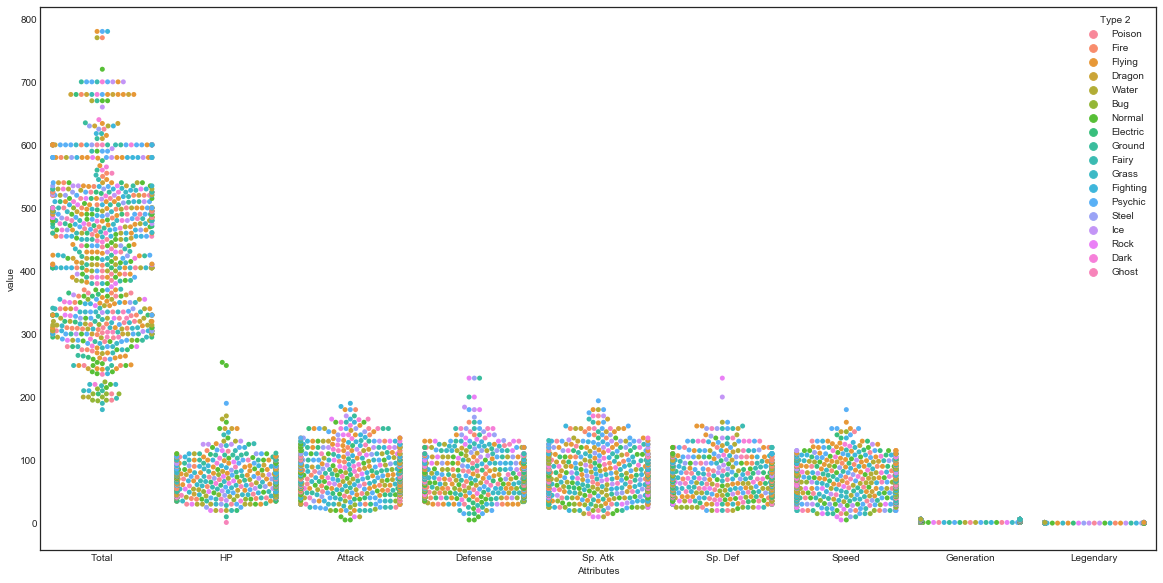

In [13]:
figure = plt.figure(figsize=(20,10))
g=sns.swarmplot(x='Attributes',y='value',data=pkmn,hue='Type 2')

In [14]:
# Now, let's look at which are the top Pokemons considering highest 'Total' score
pokemon['Total'].max()

780

In [15]:
# Here they are..
pokemon.loc[pokemon['Total']==780 , :]

,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
163,MewtwoMega Mewtwo X,Psychic,Fighting,780,106,190,100,154,100,130,1,True
164,MewtwoMega Mewtwo Y,Psychic,Psychic,780,106,150,70,194,120,140,1,True
426,RayquazaMega Rayquaza,Dragon,Flying,780,105,180,100,180,100,115,3,True


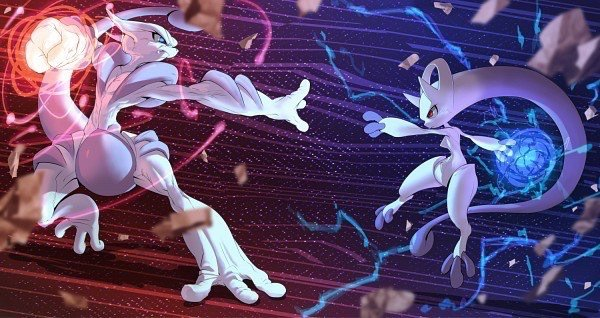

In [16]:
# So, Mewtwo X and Mewtwo Y and Rayquaza are the top 3 pokemon...
# And indeed that's true..


# Some Images... XD XD

from IPython.display import Image
Image(filename='Battle.jpg' , width=650 , height=650)

In [17]:
# Now let's Analyze the 'Legendary' column

In [18]:
pokemon['Legendary'].value_counts()

False    735
True      65
Name: Legendary, dtype: int64

In [19]:
# We can see that only 65 pokemon are 'Legendary' 

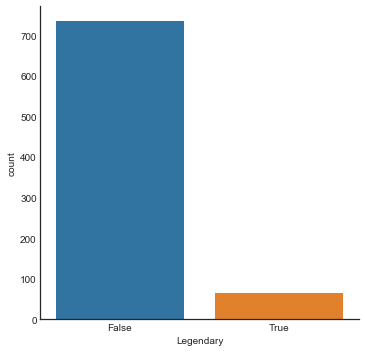

In [20]:
sns.factorplot(x='Legendary',kind='count',data=pokemon,size=5,aspect=1)

In [21]:
# Similarly, Let's Analyze 'Generation'

# Diff Generations
pokemon['Generation'].value_counts()

1    166
5    165
3    160
4    121
2    106
6     82
Name: Generation, dtype: int64

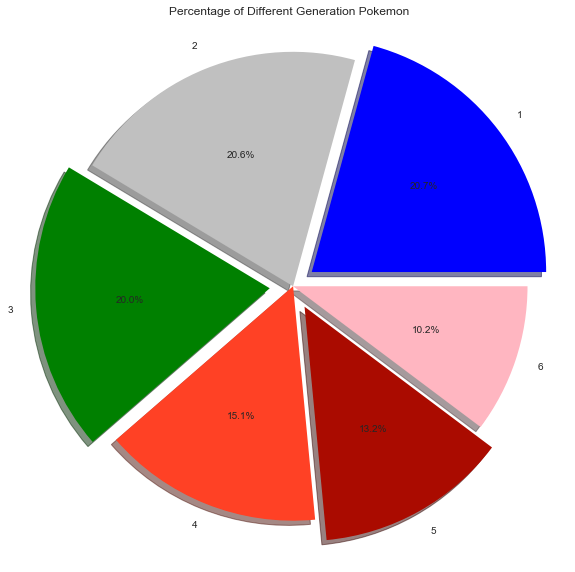

In [22]:
# Visualize 'Generation' via Pie-Chart
labels = pokemon['Generation'].unique().tolist()
sizes = pokemon['Generation'].value_counts().tolist()
cols = ['B', 'silver', 'G', '#ff4125', '#aa0b00', '#FFB6C1']
explode = ( 0.1 , 0 , 0.1 , 0 , 0.1 , 0 )

plt.pie(sizes,labels=labels,colors=cols,explode=explode,shadow=True,autopct='%1.1f%%',startangle=0)
plt.axis('equal')
plt.title("Percentage of Different Generation Pokemon")
plt.plot()
fig=plt.gcf()
fig.set_size_inches(10,10)
plt.show()

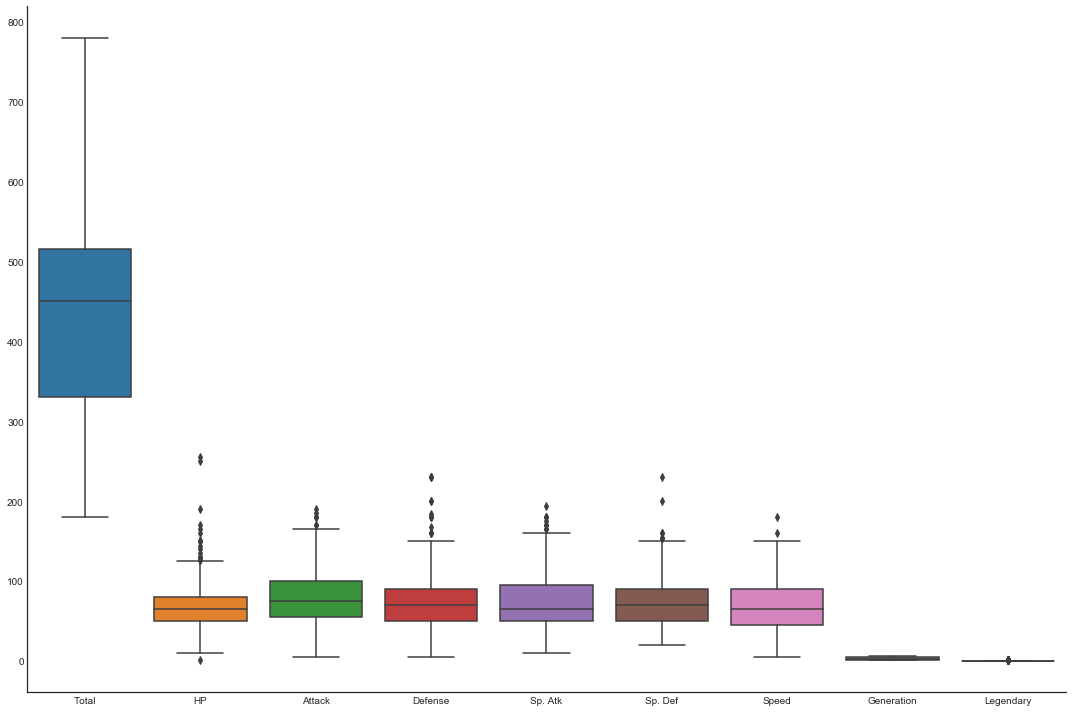

In [23]:
# Let's Try creating a BoxPlot to Analye all the columns

sns.factorplot(data=pokemon,kind='box',size=10,aspect=1.5)

In [24]:
# Understanding Box Plot :

# The bottom line indicates the min value of a particular numeric feature.
# The upper line indicates the max value.
# The middle line of the box is the median or the 50% percentile.
# The side lines of the box are the 25 and 75 percentiles respectively.

In [25]:
# Now let's compute a correlation matrix, 
# which is used to investigate the dependence between multiple variables at the same time. 

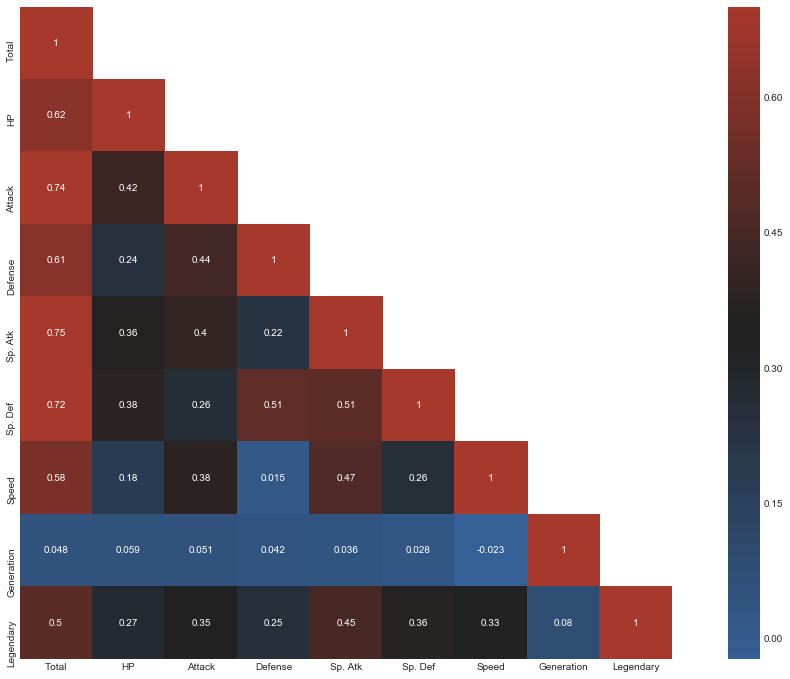

In [26]:
corr = pokemon[pokemon.columns.tolist()].corr()

# Generate a mask for the upper triangle
mask = np.array(corr)
mask[np.tril_indices_from(mask)] = False

# Set up the matplotlib figure
f,ax = plt.subplots()
f.set_size_inches(20,12)

# Generate a custom diverging colormap
cmap = sns.diverging_palette(250, 15, as_cmap=True,s=75, l=40 , n=9, center="dark")

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, vmax=.7,square=True, cmap=cmap , annot=True)

In [27]:
# We can see that 'HP', 'Attack', 'Defense','Sp. Atk', 'Sp. Def', 'Speed' are highly correlated to total.

In [28]:
# Now let's Visualize Different Types of Pokemon and their abilities with KDE plots

# Create Function ->
def comp(Type,category,feature1,feature2,color):
    type_poke = pokemon.loc[pokemon[Type]==category]
    ax=sns.kdeplot(type_poke[feature1],type_poke[feature2],cmap=color, shade=True, shade_lowest=False)
    
# Function takes in Arguments 
# 1. Type 1 or Type 2
# 2. Category of Type Pokemon
# 3. Abilities like Attack, Speed as feature1
# 4. Abilities like Attack, Speed as feature2
# 5. Color of Plot

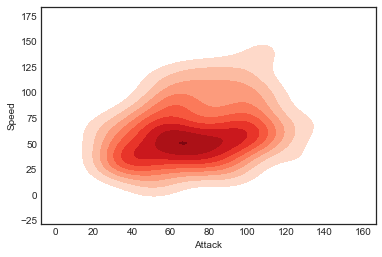

In [29]:
# Compare Grass Pokemon's Attack and Speed
comp('Type 1','Grass','Attack','Speed','Reds')

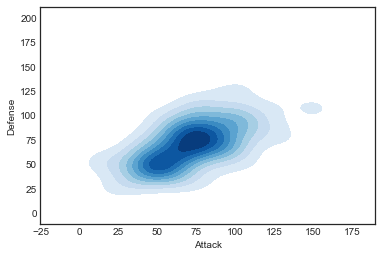

In [30]:
comp('Type 1','Water','Attack','Defense','Blues')

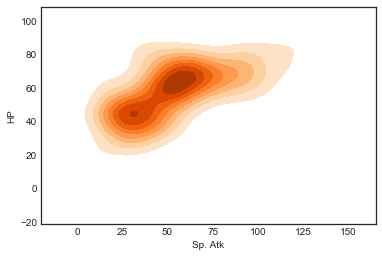

In [31]:
comp('Type 1','Bug','Sp. Atk','HP','Oranges')

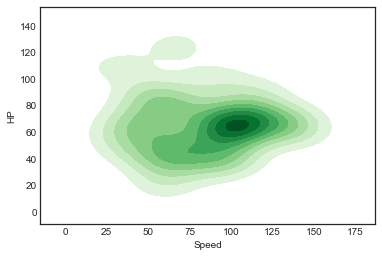

In [32]:
# Similarly for Type 2

comp('Type 2','Electric','Speed','HP','Greens')

In [33]:
# Great, Let's plot a Pairplot to Analyze , How individual abilities affect the Total Score

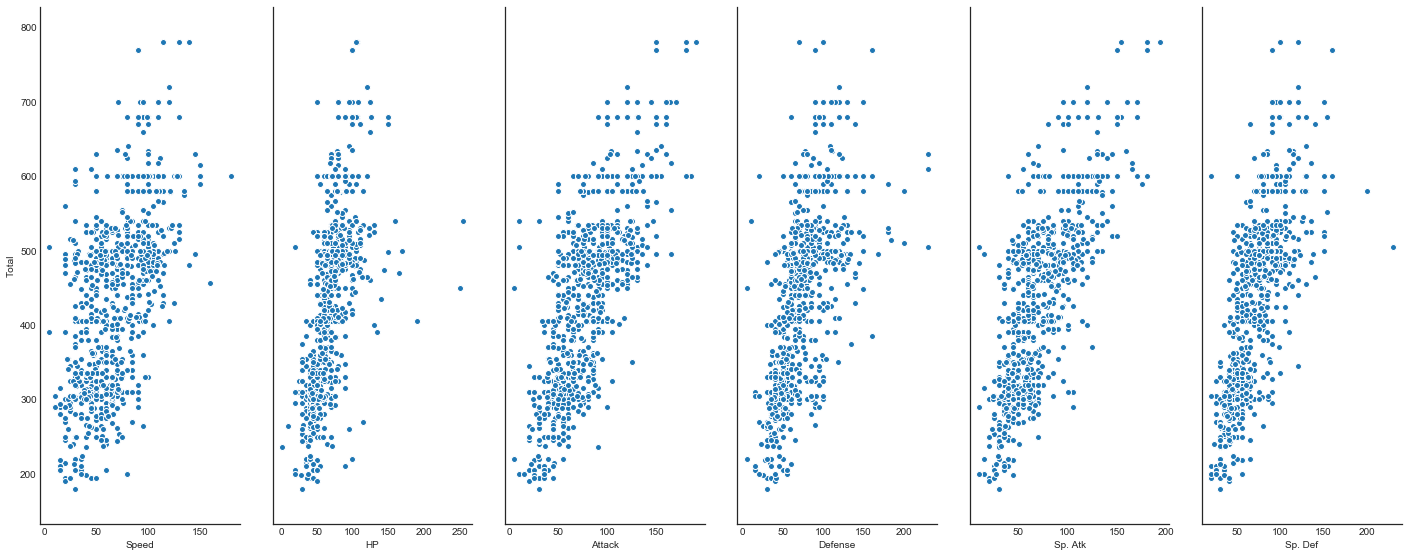

In [34]:
g=sns.pairplot(data=pokemon,y_vars=['Total'],x_vars=['Speed','HP','Attack','Defense','Sp. Atk','Sp. Def'])
g.fig.set_size_inches(20,10)

In [35]:
# We can clearly see that as the Individual ability Score increases, the Total score rises
# Each dot represents a unique Pokemon

In [36]:
# Now, Let's create a function to Analyze various Attributes based on Type of Pokemon 

# Let's Plot SwarmPlot and ViolinPlot
def comp2(Type,Attribute):
    fig, ax = plt.subplots(3,1)
    fig.set_size_inches(20,20)
    sns.swarmplot(x=Type,y=Attribute,ax=ax[0],data=pokemon)
    sns.violinplot(x=Type,y=Attribute,ax=ax[1],data=pokemon)
    sns.barplot(x=Type,y=Attribute,ax=ax[2],data=pokemon)

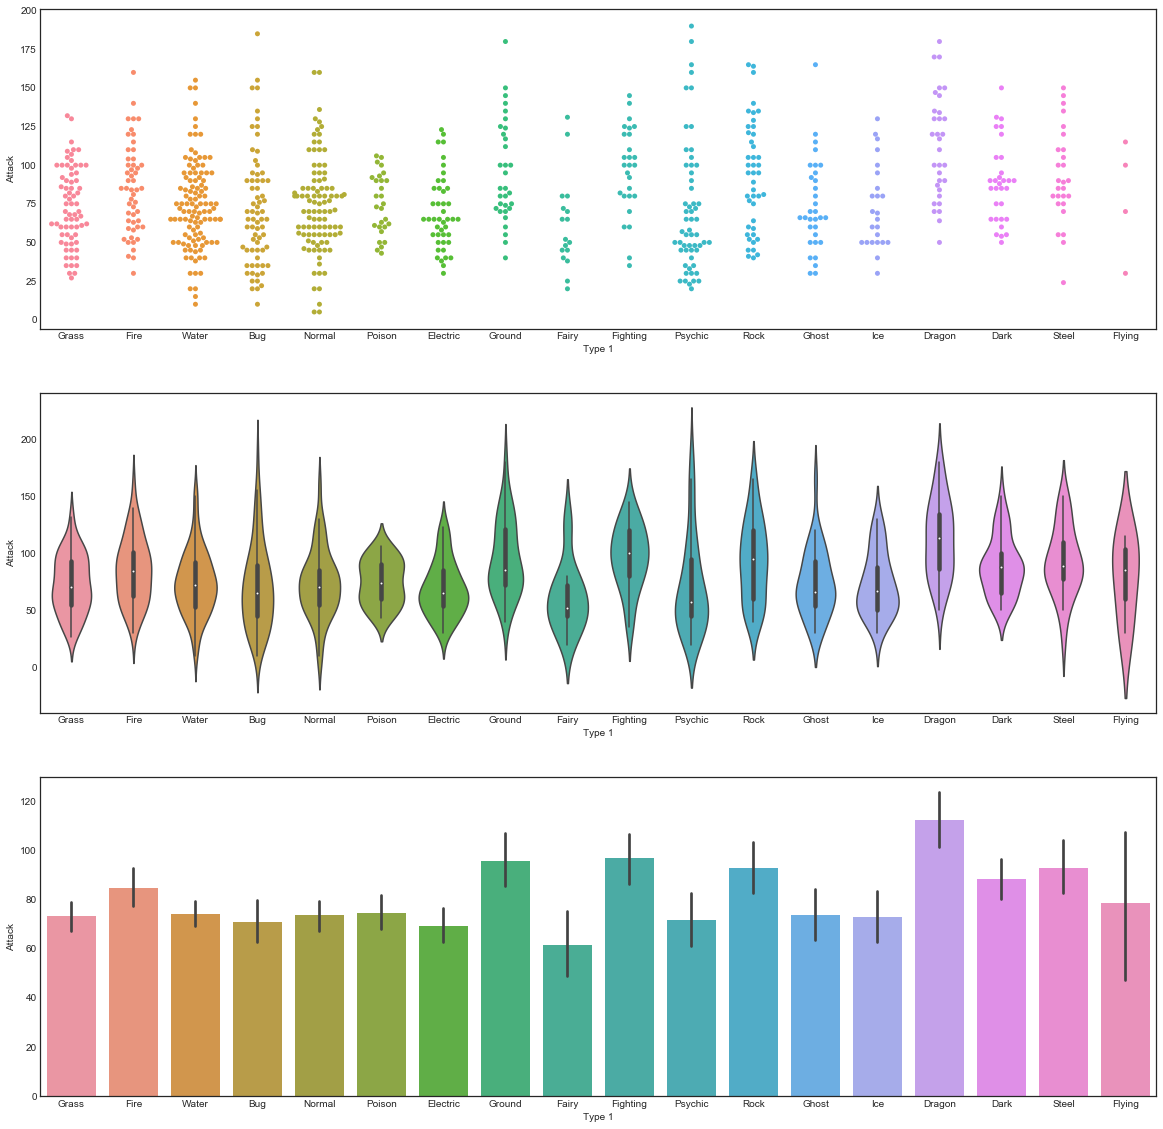

In [37]:
# Let's call the function and Compare the plots
comp2('Type 1','Attack')

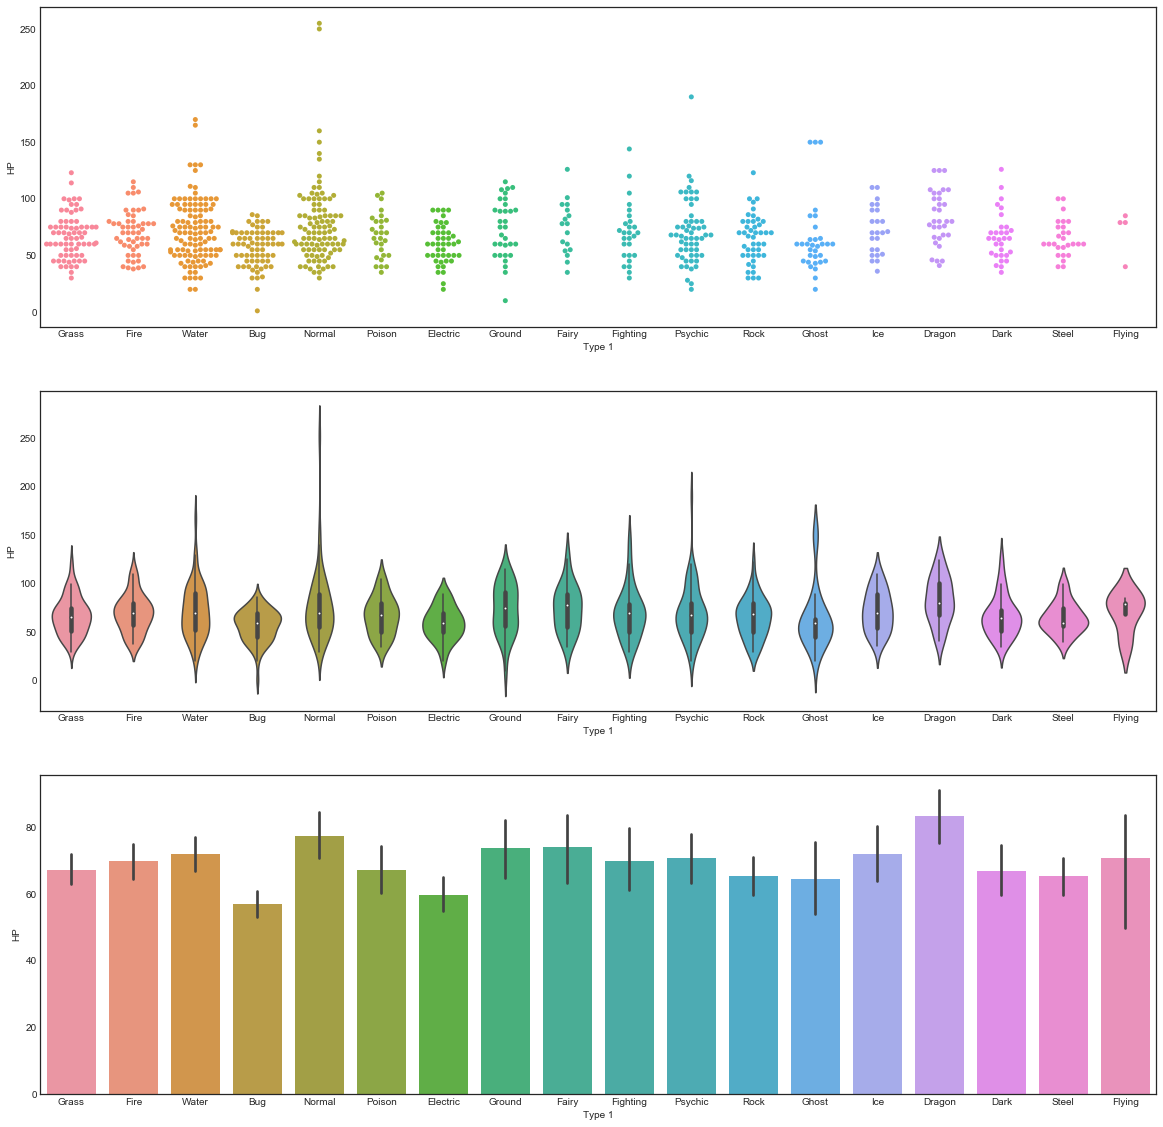

In [38]:
comp2('Type 1','HP')

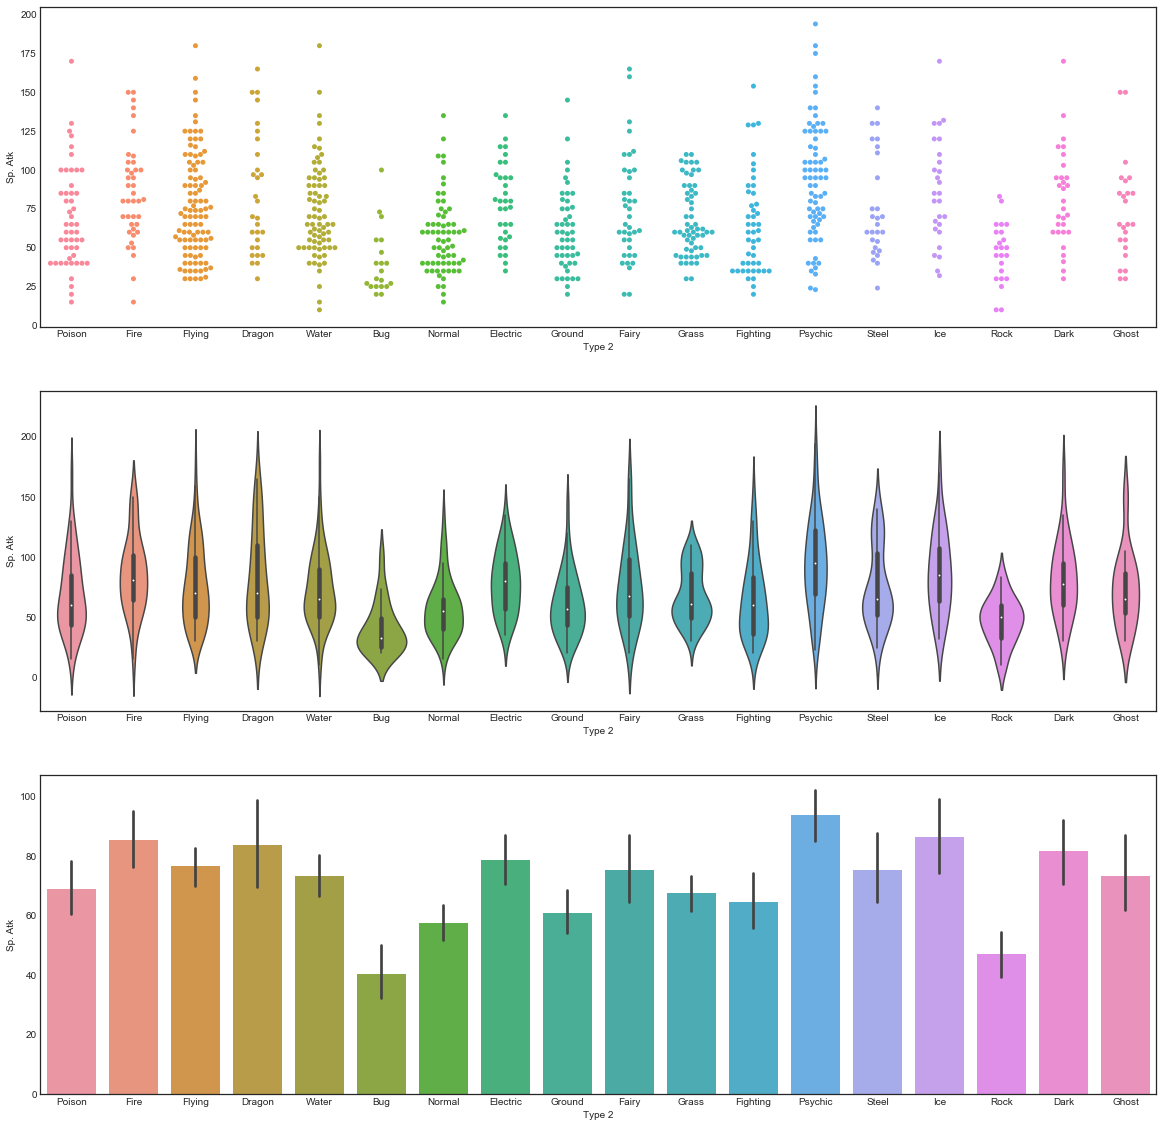

In [39]:
# Similarly for Type 2
comp2('Type 2', 'Sp. Atk')

In [40]:
# Great Progress So far, Right...

# Come on let's create jointplot to compare various Attributes.. :)

In [41]:
# We'll let's look at the 'hex' option under [kind =]. 
# This is my favorite visualization in the .jointplot() function. XD

def comp_hex(Attribute1,Attribute2,Color):
    sns.jointplot(x=Attribute1, y=Attribute2, data=pokemon, color =Color , kind ='hex', size = 8.0)
    plt.show()

C:\Users\Chinmay\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\Chinmay\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


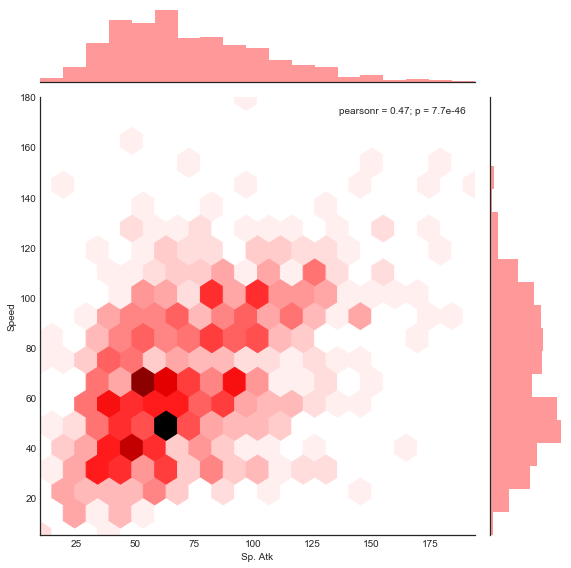

In [42]:
# Let's plot Sp. Atk vs Speed
comp_hex('Sp. Atk','Speed','Red')

In [43]:
# Awesome... That's what i like about hex, it becomes easier to see the distribution between two variables. 
# And it just looks cool, Right !!

C:\Users\Chinmay\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\Chinmay\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


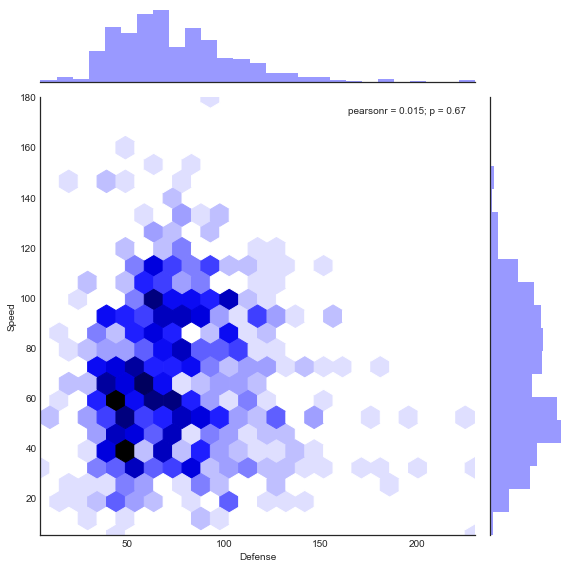

In [44]:
# One More XP
comp_hex('Defense','Speed','Blue')

In [45]:
# Nice..
# Let's proceed to comparing any 2 Pokemons

In [46]:
# Create a Function
def comp_pok(pok1,pok2,Attribute):
    sample_data = pokemon[ (pokemon['Name']==pok1) | (pokemon['Name']==pok2) ]
    g=sns.factorplot(x='Name',y=Attribute,kind='bar',data=sample_data,aspect=1,size=5)
    g.fig.suptitle('Comparision',fontsize=14)

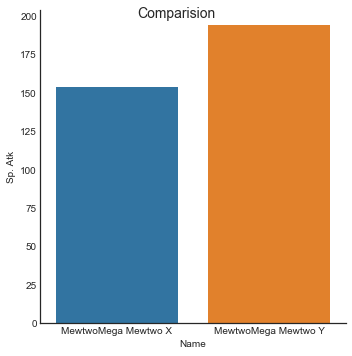

In [47]:
# Let's Compare MewtwoMega Mewtwo X vs MewtwoMega Mewtwo Y 
comp_pok('MewtwoMega Mewtwo X','MewtwoMega Mewtwo Y','Sp. Atk')

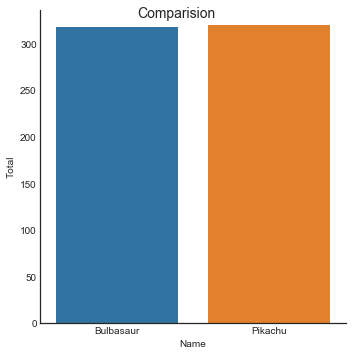

In [48]:
# Pikachu vs Bulbasaur
comp_pok('Bulbasaur','Pikachu','Total')

In [49]:
# Close..!! 

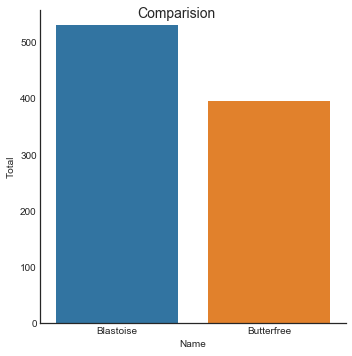

In [50]:
# last XD
comp_pok('Blastoise','Butterfree','Total') # Hehe XP 

In [52]:
# Similarly, We can compare a lot of features and plot many graphs.. 
# Analyze , Visualize almost everything..
# That's the power of Seaborn library ..! 

Thank you ;)

# ----------------------------------------- END ----------------------------------------------